# Import Necessary Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# 1. Data Collection

In [2]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 3. Data Undersatnding

In [4]:
company.shape

(400, 11)

In [5]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
company.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [10]:
company.Urban.unique()

array(['Yes', 'No'], dtype=object)

# 4.Data Preparation

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
company['ShelveLoc']= le.fit_transform(company['ShelveLoc'])
company['Urban']=  le.fit_transform(company['Urban'])
company['US'] =  le.fit_transform(company['US'])

In [12]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [13]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

# 5.Model Building

In [25]:
X = company.drop('ShelveLoc',axis=1)
y = company[['ShelveLoc']]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=12)

In [27]:
X_train.shape,y_train.shape

((340, 10), (340, 1))

In [28]:
X_test.shape,y_test.shape

((60, 10), (60, 1))

# 6.Model training

In [153]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = dt_classifier,param_grid= {'criterion':['gini','entropy'],
                                                        'max_depth':[2,3,4,5,6,7,8,9,10]},cv =3)
grid = gs.fit(X,y)

In [154]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [92]:
grid.best_score_

0.6149515579994763

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

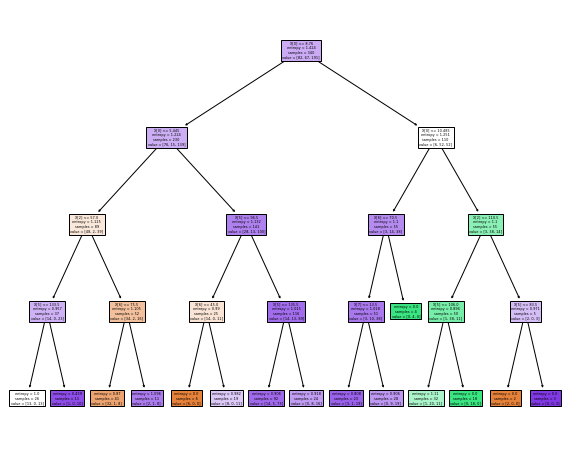

In [66]:
plt.figure(figsize=(10,8))
plot_tree(dt_classifier,filled=True)
plt.show()

# 7.Model Testing

##### Training data

In [163]:
y_pred_train = dt_classifier.predict(X_train)
y_pred_train

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1,
       0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2,

##### Test data

In [164]:
y_pred_test = dt_classifier.predict(X_test)
y_pred_test

array([0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2], dtype=int64)

## 7. Model Evaluation

In [165]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,roc_auc_score,classification_report

##### Training data

In [166]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.7970588235294118
classification_report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        82
           1       0.80      0.76      0.78        67
           2       0.82      0.84      0.83       191

    accuracy                           0.80       340
   macro avg       0.79      0.77      0.78       340
weighted avg       0.80      0.80      0.80       340

confusion matrix:
 [[ 59   1  22]
 [  2  51  14]
 [ 18  12 161]]


##### Testing data

In [167]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.6166666666666667
classification_report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.80      0.44      0.57        18
           2       0.58      0.79      0.67        28

    accuracy                           0.62        60
   macro avg       0.65      0.58      0.59        60
weighted avg       0.65      0.62      0.61        60

confusion matrix:
 [[ 7  0  7]
 [ 1  8  9]
 [ 4  2 22]]


# Using Gini Criterian

In [136]:
dt_classifier_gini = DecisionTreeClassifier(criterion= 'gini', max_depth= 5)
dt_classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

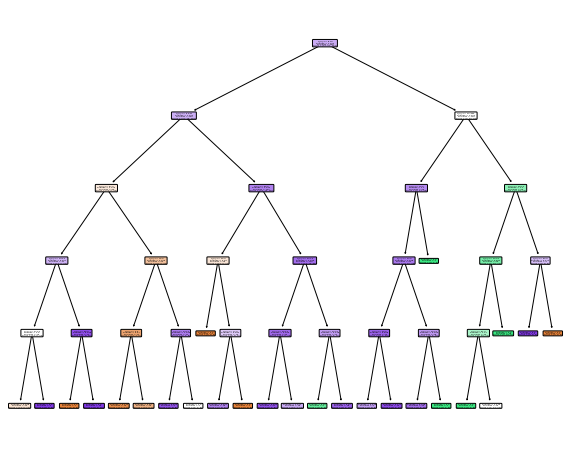

In [137]:
plt.figure(figsize=(10.,8))
plot_tree(dt_classifier,filled=True,rounded=True)
plt.show()

# 7.Model Testing

##### Training data

In [138]:
y_pred_train = dt_classifier_gini.predict(X_train)
y_pred_train

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2,

##### Test data

In [139]:
y_pred_test = dt_classifier_gini.predict(X_test)
y_pred_test

array([0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2], dtype=int64)

## 7. Model Evaluation

In [140]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.7764705882352941
classification_report:
               precision    recall  f1-score   support

           0       0.83      0.54      0.65        82
           1       0.97      0.55      0.70        67
           2       0.73      0.96      0.83       191

    accuracy                           0.78       340
   macro avg       0.85      0.68      0.73       340
weighted avg       0.80      0.78      0.76       340

confusion matrix:
 [[ 44   0  38]
 [  2  37  28]
 [  7   1 183]]


##### Training data

In [141]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.55
classification_report:
               precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.71      0.28      0.40        18
           2       0.51      0.86      0.64        28

    accuracy                           0.55        60
   macro avg       0.63      0.47      0.48        60
weighted avg       0.61      0.55      0.51        60

confusion matrix:
 [[ 4  0 10]
 [ 0  5 13]
 [ 2  2 24]]
